In [119]:
import pandas as pd

print("Packages Imported")

Packages Imported


Working on importing the data, and formatting it to make it work with the random forest sklearn

In [120]:
#getting infor about the data
x_train = pd.read_csv("titanic_train.csv")
print(x_train.head())
print(x_train.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [121]:
x_train = x_train.drop(columns = ["Name","Cabin","Ticket"])
x_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [122]:
#missing data
print(x_train.shape)
print(x_train.isna().sum())
print(x_train.dropna())

#approx 100 rows are dropped when removing na. Not bad, but ideally would be something better

(891, 9)
PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0              1         0       3    male  22.0      1      0   7.2500   
1              2         1       1  female  38.0      1      0  71.2833   
2              3         1       3  female  26.0      0      0   7.9250   
3              4         1       1  female  35.0      1      0  53.1000   
4              5         0       3    male  35.0      0      0   8.0500   
..           ...       ...     ...     ...   ...    ...    ...      ...   
885          886         0       3  female  39.0      0      5  29.1250   
886          887         0       2    male  27.0      0      0  13.0000   
887          888         1       1  female  19.0      0      0  30.0000   
889          890         1       1    male  26.0      0  

In [123]:
#seperating the results from the train
y_train = x_train.drop(columns = ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"])
y_train.set_index("PassengerId",inplace = True)
y_train.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [124]:
#finishing up x_train
x_train = x_train.drop(columns = ["Survived"])
x_train['Sex'] = (x_train['Sex'] == 'male').astype(int)
x_train.set_index("PassengerId",inplace = True)
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,22.0,1,0,7.2500,S
2,1,0,38.0,1,0,71.2833,C
3,3,0,26.0,0,0,7.9250,S
4,1,0,35.0,1,0,53.1000,S
5,3,1,35.0,0,0,8.0500,S


In [125]:
#editing embarked
def embark_fix(x):
    if x == "C":
        return 0
    if x == "Q":
        return 1
    if x == "S":
        return 2
    
x_train["Embarked"] = x_train["Embarked"].apply(embark_fix)
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,22.0,1,0,7.2500,2.0
2,1,0,38.0,1,0,71.2833,0.0
3,3,0,26.0,0,0,7.9250,2.0
4,1,0,35.0,1,0,53.1000,2.0
5,3,1,35.0,0,0,8.0500,2.0


In [126]:
x_test = pd.read_csv("titanic_test.csv")
x_test = x_test.drop(columns = ["Name","Cabin","Ticket"])

x_test['Sex'] = (x_test['Sex'] == 'male').astype(int)
x_test["Embarked"] = x_test["Embarked"].apply(embark_fix)

x_test.set_index("PassengerId",inplace = True)

x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,1,34.5,0,0,7.8292,1
893,3,0,47.0,1,0,7.0000,2
894,2,1,62.0,0,0,9.6875,1
895,3,1,27.0,0,0,8.6625,2
896,3,0,22.0,1,1,12.2875,2


In [127]:
#importing the results data set
y_test = pd.read_csv("titanic_results.csv")
y_test.set_index("PassengerId",inplace = True)
y_test.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


Exploring the data before making some predictions

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

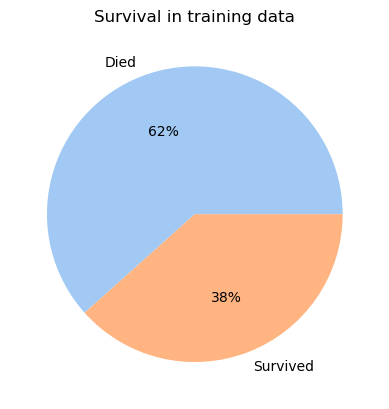

In [129]:
#survive
data = y_train["Survived"].value_counts().values
keys = ["Died","Survived"]

palette_color = sns.color_palette("pastel")

plt.title("Survival in training data")
plt.pie(data,labels = keys, colors = palette_color, autopct = '%.0f%%')

plt.show()

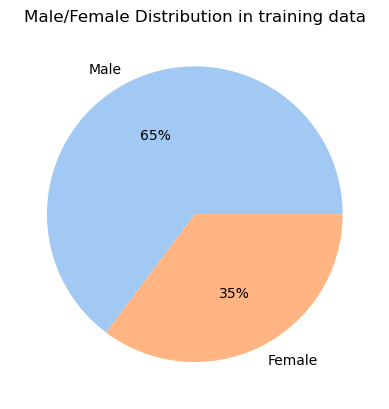

In [130]:
#gender
data = x_train["Sex"].value_counts().values
keys = ["Male","Female"]

palette_color = sns.color_palette("pastel")

plt.title("Male/Female Distribution in training data")
plt.pie(data,labels = keys, colors = palette_color, autopct = '%.0f%%')

plt.show()

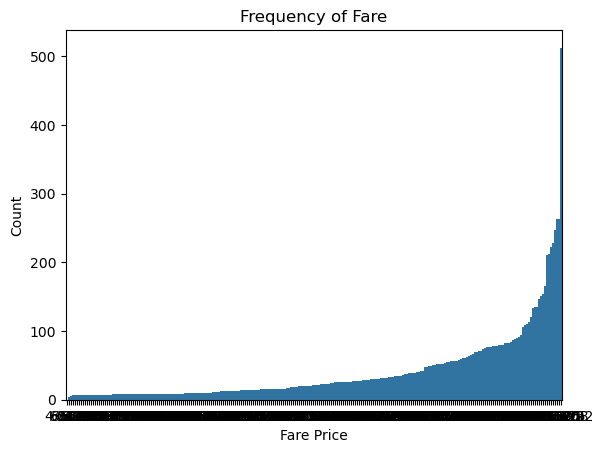

In [131]:
#fare
sns.barplot(x = x_train["Fare"].value_counts().index,
            y = x_train["Fare"].value_counts().index)

plt.title("Frequency of Fare")
plt.xlabel("Fare Price")
plt.ylabel("Count")
plt.show()

Begining Prediction using sklearn and random forest

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

/home/artur-kumik/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [134]:
y_pred = rf.predict(x_test)
rf.score(x_test,y_test)

0.8205741626794258

In [135]:
from sklearn.metrics import classification_report

In [136]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       266
           1       0.75      0.75      0.75       152

    accuracy                           0.82       418
   macro avg       0.81      0.81      0.81       418
weighted avg       0.82      0.82      0.82       418



In [137]:
#which features are the most important in the prediction
features = pd.DataFrame(rf.feature_importances_,index = x_train.columns)
features

,0
Pclass,0.081482
Sex,0.260533
Age,0.260852
SibSp,0.049185
Parch,0.038618
Fare,0.276498
Embarked,0.032832


Prediction with Hyper Parameters. Using the same data set but a more customized Random Forest Classifier that will hopefully return a more promising and accurate prediction

In [138]:
#hyperparameters
rf2 = RandomForestClassifier(
    n_estimators = 1000,
    criterion = "entropy",
    min_samples_split = 10,
    max_depth = 14,
    random_state = 42
)
rf2.fit(x_train,y_train)

/home/artur-kumik/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_split=10,
                       n_estimators=1000, random_state=42)

In [139]:
rf2.score(x_test,y_test)

0.861244019138756

In [140]:
y_pred2 = rf2.predict(x_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       266
           1       0.85      0.75      0.80       152

    accuracy                           0.86       418
   macro avg       0.86      0.84      0.85       418
weighted avg       0.86      0.86      0.86       418



In [141]:
features2 = pd.DataFrame(rf2.feature_importances_,index = x_train.columns)
features2

,0
Pclass,0.106431
Sex,0.299782
Age,0.224933
SibSp,0.051007
Parch,0.038778
Fare,0.243038
Embarked,0.036033


Logistic regression

In [142]:
from sklearn.linear_model import LogisticRegression

In [143]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 55.7 KB


In [144]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values